# MNEST Image Classification

Brandt Green

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns; sns.set_theme()
from sklearn.metrics import confusion_matrix

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))
xshape = x_train.shape[1:4]

Just some initial exploration!

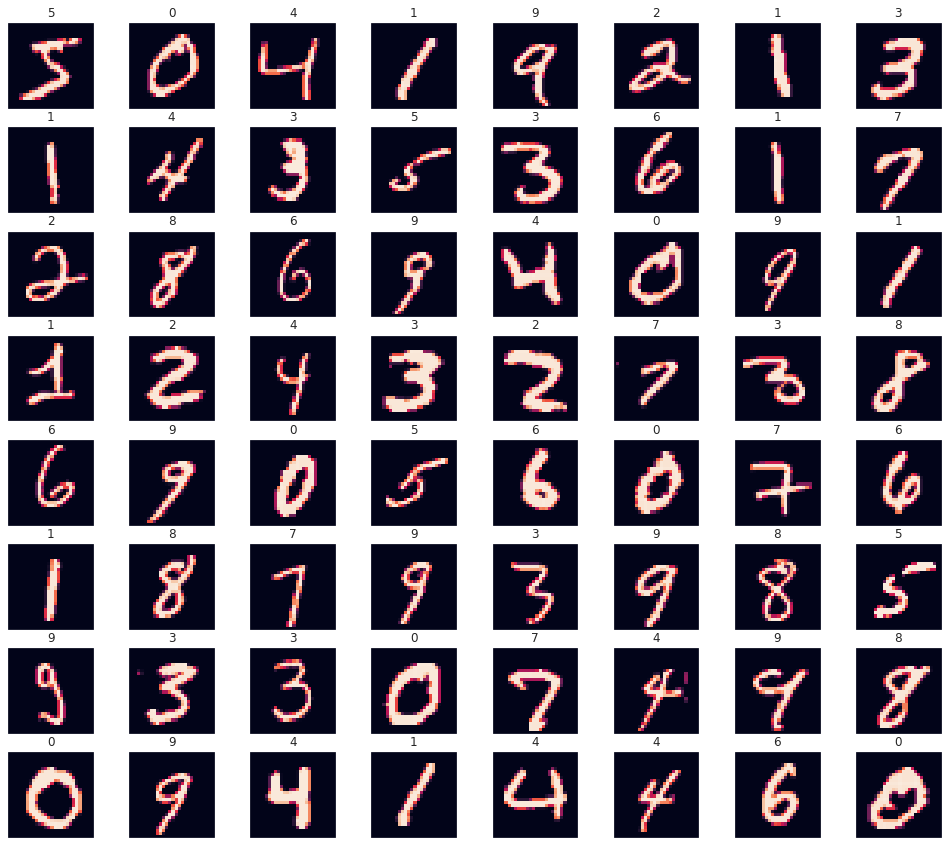

In [4]:
imgs_to_show = 64
f, axes = plt.subplots(8,8,figsize=(17,15))
ax_ray = axes.flatten()
for i in range(imgs_to_show):
    ax_ray[i].imshow(x_train[i][:,:,0])
    ax_ray[i].get_xaxis().set_visible(False)
    ax_ray[i].get_yaxis().set_visible(False)
    ax_ray[i].title.set_text(str(y_train[i])) 

In [5]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=50,kernel_size=(4,4),activation=tf.nn.relu,input_shape=xshape))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2))

model.add(tf.keras.layers.Conv2D(filters=150,kernel_size=(4,4),activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(150,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(0.0009)))

model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


#---------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 50)        850       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 150)         120150    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 150)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dropout (Dropout)           (None, 2400)              0

In [6]:
epochs = 50 # Set a shit ton of epochs and then implement early stopping so that it likely won't actually go all the way.
batch_size = 75

earlystopper = EarlyStopping(patience=5, verbose=1)
results = model.fit(x_train,y_train,epochs=epochs,validation_split=0.2,batch_size=batch_size, callbacks=[earlystopper])

print()

Epoch 1/50
640/640 [==============================] - 20s 12ms/step - loss: 0.3017 - accuracy: 0.9459 - val_loss: 0.1427 - val_accuracy: 0.9818
Epoch 2/50
640/640 [==============================] - 7s 11ms/step - loss: 0.1256 - accuracy: 0.9801 - val_loss: 0.1010 - val_accuracy: 0.9860
Epoch 3/50
640/640 [==============================] - 7s 11ms/step - loss: 0.0988 - accuracy: 0.9844 - val_loss: 0.0954 - val_accuracy: 0.9856
Epoch 4/50
640/640 [==============================] - 7s 11ms/step - loss: 0.0917 - accuracy: 0.9852 - val_loss: 0.0905 - val_accuracy: 0.9863
Epoch 5/50
640/640 [==============================] - 7s 11ms/step - loss: 0.0853 - accuracy: 0.9866 - val_loss: 0.0963 - val_accuracy: 0.9851
Epoch 6/50
640/640 [==============================] - 7s 11ms/step - loss: 0.0819 - accuracy: 0.9879 - val_loss: 0.0849 - val_accuracy: 0.9887
Epoch 7/50
640/640 [==============================] - 8s 12ms/step - loss: 0.0762 - accuracy: 0.9892 - val_loss: 0.0811 - val_accuracy: 0.988

In [7]:
history_df = pd.DataFrame(results.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.301746,0.945938,0.142728,0.981833
1,0.125607,0.980125,0.100974,0.986000
2,0.098845,0.984417,0.095428,0.985583
3,0.091662,0.985208,0.090549,0.986333
4,0.085341,0.986583,0.096340,0.985083
5,0.081873,0.987938,0.084906,0.988667
6,0.076200,0.989167,0.081147,0.988917
7,0.076262,0.989313,0.087808,0.987000
8,0.074833,0.989313,0.078980,0.989167
9,0.068430,0.990812,0.078211,0.989583


Best results, based on validation set:

In [8]:
best_results = history_df.sort_values('val_accuracy',ascending=False).iloc[0]
best_epoch = best_results.name + 1

print(f"Best results were achieved on epoch {best_epoch}:\n\n{best_results}")

Best results were achieved on epoch 23:

loss            0.045238
accuracy        0.994646
val_loss        0.057804
val_accuracy    0.991833
Name: 22, dtype: float64


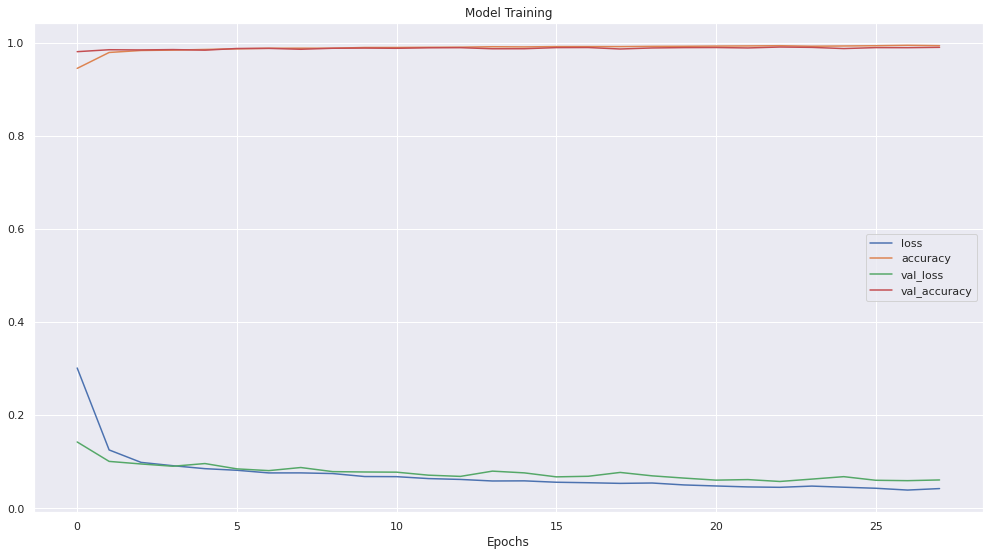

In [9]:
history_df.plot(figsize=(17,9))
plt.title('Model Training')
plt.xlabel('Epochs');

Now, let's train the model on the entire training data set:

In [10]:
results = model.fit(x_train,y_train,epochs=best_epoch,batch_size=batch_size)

Epoch 1/23
800/800 [==============================] - 8s 10ms/step - loss: 0.0473 - accuracy: 0.9936
Epoch 2/23
800/800 [==============================] - 8s 10ms/step - loss: 0.0457 - accuracy: 0.9940
Epoch 3/23
800/800 [==============================] - 8s 10ms/step - loss: 0.0411 - accuracy: 0.9948
Epoch 4/23
800/800 [==============================] - 8s 10ms/step - loss: 0.0408 - accuracy: 0.9947
Epoch 5/23
800/800 [==============================] - 8s 10ms/step - loss: 0.0399 - accuracy: 0.9950
Epoch 6/23
800/800 [==============================] - 8s 10ms/step - loss: 0.0420 - accuracy: 0.9948
Epoch 7/23
800/800 [==============================] - 8s 10ms/step - loss: 0.0379 - accuracy: 0.9952
Epoch 8/23
800/800 [==============================] - 8s 10ms/step - loss: 0.0392 - accuracy: 0.9951
Epoch 9/23
800/800 [==============================] - 8s 10ms/step - loss: 0.0370 - accuracy: 0.9955
Epoch 10/23
800/800 [==============================] - 8s 10ms/step - loss: 0.0357 - accura

Test the fully trained model on the test set that has never been seen before!

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0458 - accuracy: 0.9924


[0.045774560421705246, 0.9923999905586243]

The accuracy on the test set is 99.23% which is actually better than the best validation accuracy we were seeing during the training process. I think we should be pretty satisfied with this result as it indicates at that we were not over fitting to our initial data set. If this out-of-sample result had come out to be 80% or something like that, then we clearly need to figure out how to make our data more robust to new inputs. 

Of course, the test set accuracy is not better than the in-sample accuracy of 99.66%, but it would be shocking and suspicious if it was!  

#### Further Evaluation

Let's examine a confusion matrix to explore where we are making the most errors. We present the confusion matrix of the raw values, but that can be a bit difficult to take in on big data sets, so a heatmap of the results is also presented below. 

Rows are what the actual numbers were, the columns are our predictions. This shows us that we misclassify a lot of 5s as 8s

In [13]:
predict_probs = model.predict(x_test)
y_pred = np.argmax(predict_probs,axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 977,    0,    1,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1030,    0,    0,    0,    0,    1,    1,    0],
       [   0,    1,    1, 1006,    0,    0,    0,    1,    1,    0],
       [   0,    0,    0,    0,  977,    0,    1,    1,    2,    1],
       [   1,    0,    0,   10,    0,  876,    2,    1,    2,    0],
       [   2,    2,    1,    1,    2,    1,  948,    0,    1,    0],
       [   0,    2,    5,    0,    0,    0,    0, 1021,    0,    0],
       [   0,    0,    2,    1,    0,    0,    0,    0,  970,    1],
       [   1,    0,    0,    0,    9,    3,    1,    8,    1,  986]])

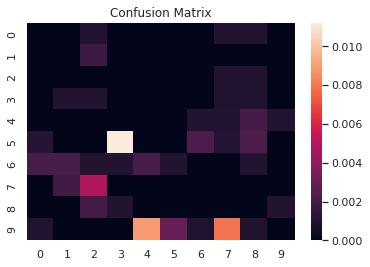

In [14]:
conf_matrix_norm = conf_matrix/conf_matrix.sum(axis=1,keepdims=True)
np.fill_diagonal(conf_matrix_norm,0)
conf_matrix_norm
sns.heatmap(conf_matrix_norm)
plt.title('Confusion Matrix');

In [15]:
miss_mask = y_pred != y_test
missed_x_vals = x_test[miss_mask]
missed_y_vals = y_test[miss_mask]
missed_y_pred = y_pred[miss_mask]

Now let's see where our errors come from:

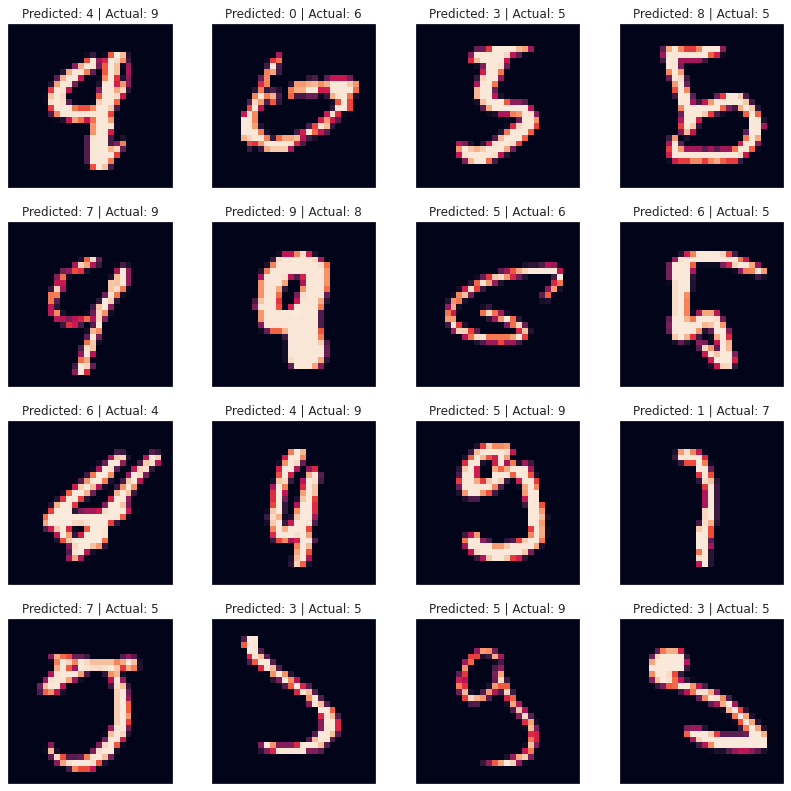

In [17]:
imgs_to_show = 16
f, axes = plt.subplots(4,4,figsize=(14,14))
ax_ray = axes.flatten()
for i in range(imgs_to_show):
    ax_ray[i].imshow(missed_x_vals[i][:,:,0])
    ax_ray[i].get_xaxis().set_visible(False)
    ax_ray[i].get_yaxis().set_visible(False)
    ax_ray[i].title.set_text(f'Predicted: {str(missed_y_pred[i])} | Actual: {str(missed_y_vals[i])}') 

Based on both the confusion matrix and the plots above, we can say that our model has a fair amount of trouble with 5s and 9s, but honestly, these errors seem incredbily reasonable and I would have gotten many of these incorrect as well. These are just difficult numbers to classify, especially when they are poorly drawn. 

I can't imagine any model achieving 100%, and the reason for that is because the "actual" ground truth is based on whatever the drawer says it is. Too much subjectivity is involved. If everyone in the world (include the model) thinks the number drawn is a 1, but you (the artist) tell us that it is a 7, then everyone is "wrong".